<a href="https://colab.research.google.com/github/Rohit-Chatterjee08/rcworld/blob/main/Linear_Regression_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [4]:
boston_features = {
    "Average Number of Rooms": 5,
}

X_train_1d = X_train[:, boston_features["Average Number of Rooms"]]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features["Average Number of Rooms"]]

(404,)


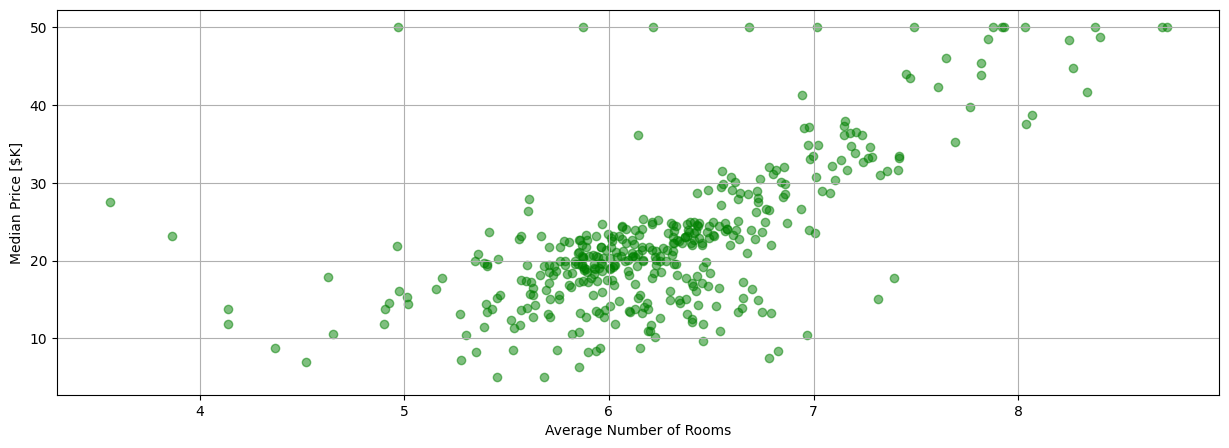

In [5]:
plt.figure(figsize=(15, 5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color="green", alpha=0.5)

In [6]:
model = Sequential()

# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))

# Display a summary of the model architecture.
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

In [8]:
history = model.fit(
    X_train_1d,
    y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3,
)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 216.0696 - val_loss: 292.2362
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 196.1144 - val_loss: 273.5803
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 181.2207 - val_loss: 256.3676
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 167.4635 - val_loss: 240.0743
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 154.5549 - val_loss: 224.6265
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 142.4520 - val_loss: 210.0121
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 131.1454 - val_loss: 196.2272
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 120.6299 - val_loss: 183.2695
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 110.9003 - val_loss: 171.1360
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 101.9504 - val_loss: 159.8236
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 93.7732 - val_loss: 149.3284
Epoch 12/101
1

In [9]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

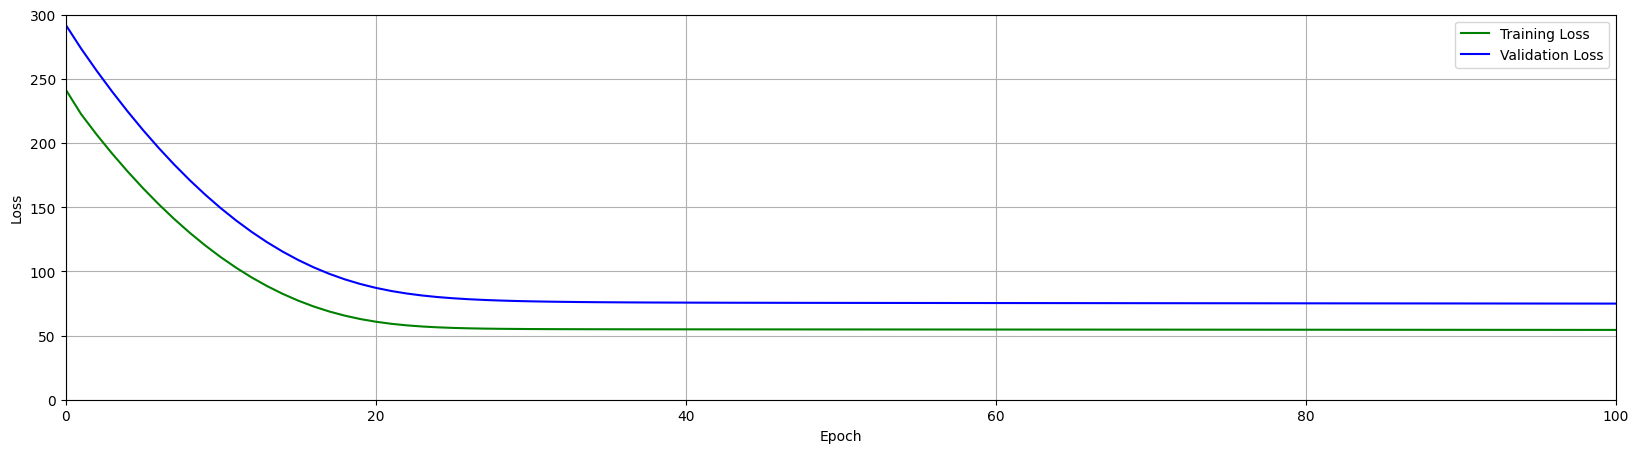

In [10]:
plot_loss(history)

In [11]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = np.array([3, 4, 5, 6, 7])
y_pred = model.predict(x)
for idx in range(len(x)):
    predicted_price = y_pred[idx].item()
    print(f"Predicted price of a home with {x[idx]} rooms: ${int(predicted_price * 10) / 10}K")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted price of a home with 3 rooms: $11.2K
Predicted price of a home with 4 rooms: $14.6K
Predicted price of a home with 5 rooms: $17.9K
Predicted price of a home with 6 rooms: $21.3K
Predicted price of a home with 7 rooms: $24.6K


In [12]:
# Generate feature data that spans the range of interest for the independent variable.
x = np.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [13]:
def plot_data(x_data, y_data, x, y, title=None):

    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

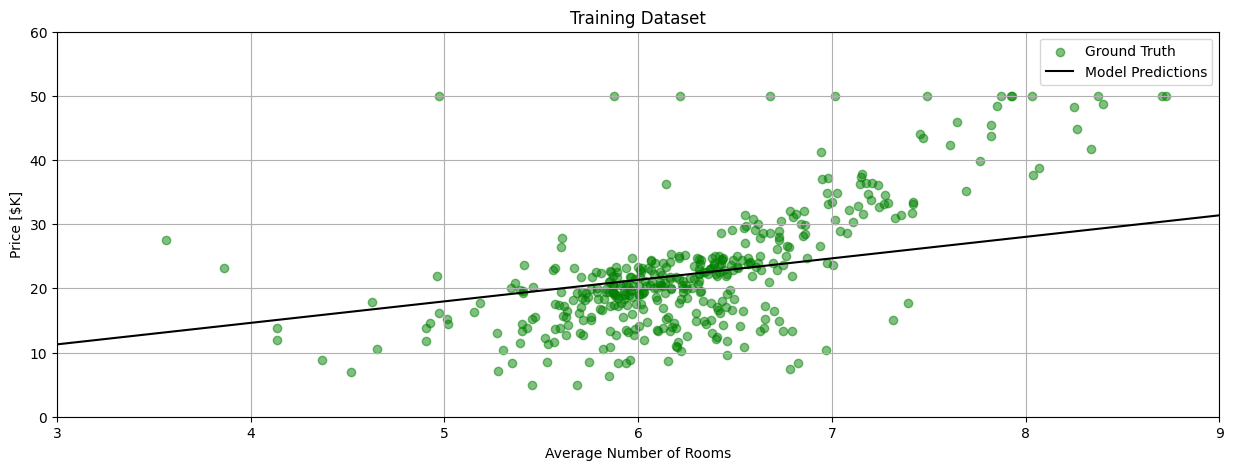

In [14]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

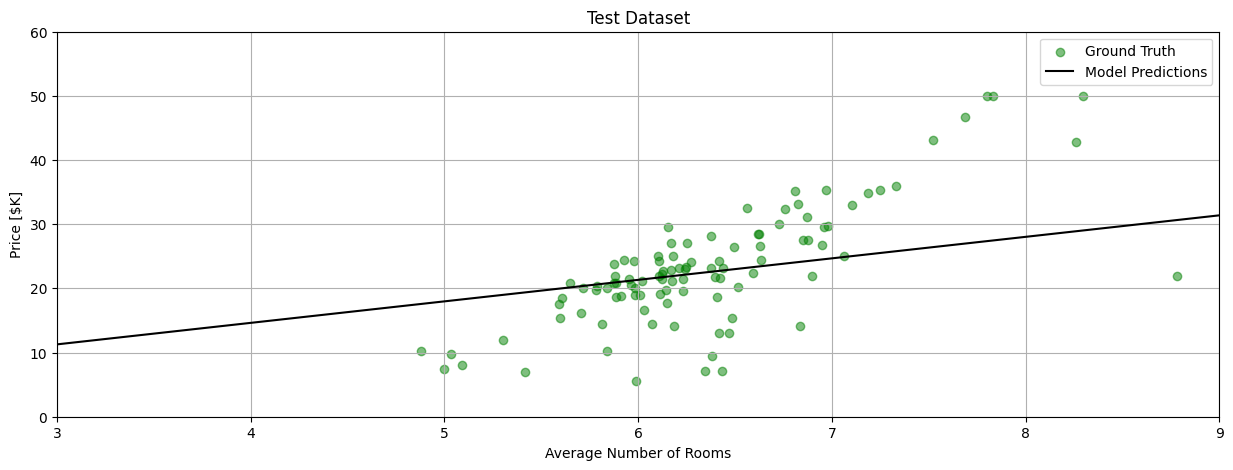

In [15]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')